#  1. Importações e dados
.

In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [45]:
# Carregando os dados
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/acidentes_pbic_2020_2025_limpo.csv', encoding="utf-8")

# 2. Corrigir vírgula para ponto e converter para float
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.', regex=False).astype(float)

# 3. Selecionar apenas as colunas desejadas
colunas = [
    'uf', 'br', 'km', 'municipio',
    'tipo_acidente', 'classificacao_acidente',
    'tipo_pista', 'latitude', 'longitude'
]
df_filtrado = df[colunas]

# 4. Exportar para um novo CSV
df_filtrado.to_csv("acidentes_prf_filtrado.csv", index=False)


/tmp/ipykernel_41475/1660278261.py:2: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/acidentes_pbic_2020_2025_limpo.csv', encoding="utf-8")


In [46]:
df = df.dropna(subset=['pesid'])


df.head()



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,longitude,regional,delegacia,uop,ano_arquivo,mes,dia_mes,hora,gravidade_numerica,total_vitimas
0,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,-49.10745,SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
1,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,-49.10745,SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
2,260031.0,578991.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,-49.10745,SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
3,260031.0,578986.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,-49.10745,SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0
4,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,-49.10745,SPRF-TO,DEL02-TO,UOP02-DEL01-TO,2020,1,1,1,2,1.0


In [68]:
print(df.columns)


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ano_arquivo',
       'mes', 'dia_mes', 'hora', 'gravidade_numerica', 'total_vitimas'],
      dtype='object')


### Distribuição dos Acidentes por Tipo de Pista
Aqui verificamos quais tipos de pista concentram mais acidentes.


🚦 Distribuição de acidentes por tipo de pista:
    1. Simples: 1,353,781 acidentes
    2. Dupla: 944,682 acidentes
    3. Múltipla: 212,322 acidentes


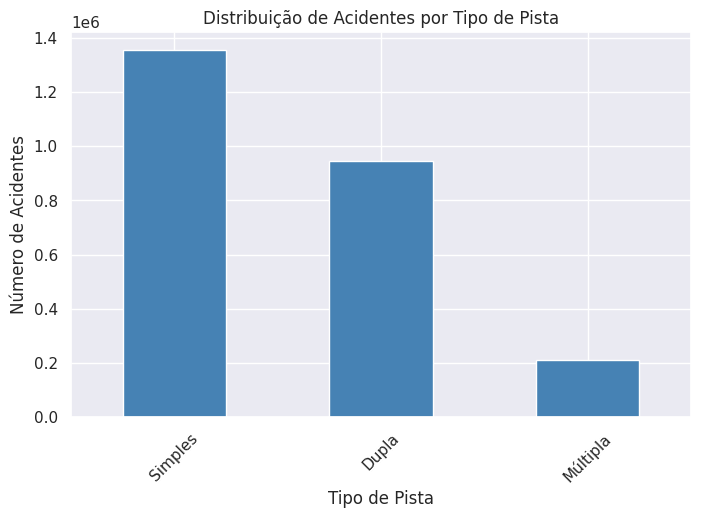

In [47]:
if 'tipo_pista' in df.columns:
    pista_counts = df['tipo_pista'].value_counts().head(10)

    print("🚦 Distribuição de acidentes por tipo de pista:")
    for i, (pista, qtd) in enumerate(pista_counts.items(), 1):
        print(f"   {i:2d}. {pista}: {qtd:,} acidentes")

    # Visualização
    pista_counts.plot(kind='bar', figsize=(8,5), color='steelblue')
    plt.title("Distribuição de Acidentes por Tipo de Pista")
    plt.xlabel("Tipo de Pista")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.show()


🏷️ Top combinações Tipo de Pista × Classificação do Acidente:
   Simples - Com Vítimas Feridas: 946,692 acidentes
   Dupla - Com Vítimas Feridas: 747,019 acidentes
   Simples - Com Vítimas Fatais: 282,127 acidentes
   Múltipla - Com Vítimas Feridas: 177,102 acidentes
   Simples - Sem Vítimas: 124,895 acidentes
   Dupla - Sem Vítimas: 107,735 acidentes
   Dupla - Com Vítimas Fatais: 89,926 acidentes
   Múltipla - Sem Vítimas: 20,834 acidentes
   Múltipla - Com Vítimas Fatais: 14,386 acidentes


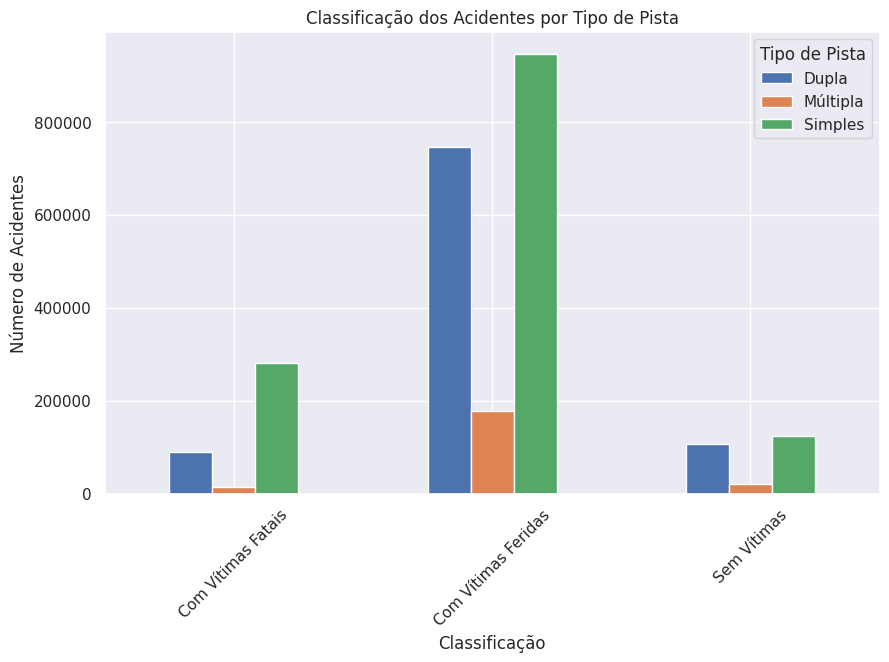

In [48]:
if 'tipo_pista' in df.columns and 'classificacao_acidente' in df.columns:
    class_pista = df.groupby(['tipo_pista', 'classificacao_acidente']).size().reset_index(name='acidentes')
    top_class_pista = class_pista.sort_values('acidentes', ascending=False).head(15)

    print("🏷️ Top combinações Tipo de Pista × Classificação do Acidente:")
    for i, row in top_class_pista.iterrows():
        print(f"   {row['tipo_pista']} - {row['classificacao_acidente']}: {row['acidentes']:,} acidentes")

    # Visualização
    pivot = class_pista.pivot(index='classificacao_acidente', columns='tipo_pista', values='acidentes').fillna(0)
    pivot.plot(kind='bar', figsize=(10,6))
    plt.title("Classificação dos Acidentes por Tipo de Pista")
    plt.xlabel("Classificação")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Pista")
    plt.show()


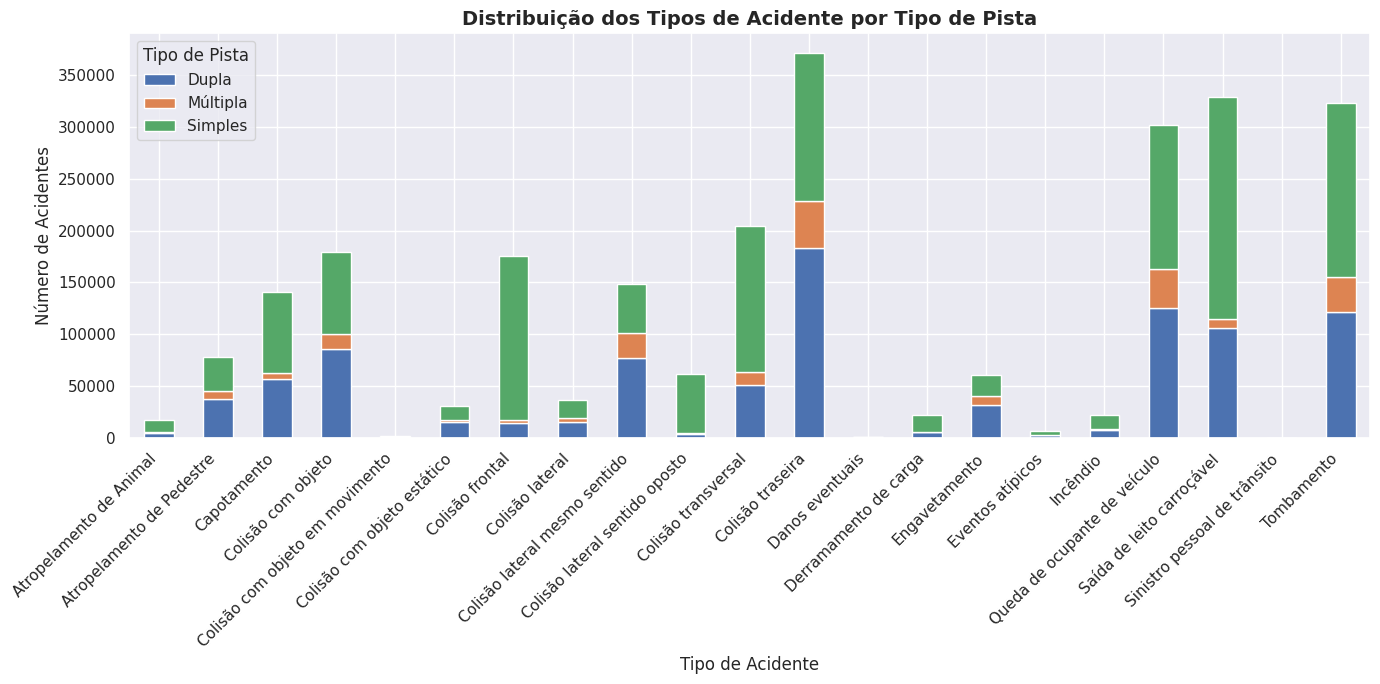

In [49]:
if 'tipo_pista' in df.columns and 'tipo_acidente' in df.columns:
    acidente_pista = df.groupby(['tipo_pista', 'tipo_acidente']).size().reset_index(name='acidentes')

    pivot = acidente_pista.pivot(index='tipo_acidente', columns='tipo_pista', values='acidentes').fillna(0)

    pivot.plot(kind='bar', figsize=(14,7), stacked=True)
    plt.title("Distribuição dos Tipos de Acidente por Tipo de Pista", fontsize=14, fontweight='bold')
    plt.xlabel("Tipo de Acidente")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Tipo de Pista")
    plt.tight_layout()
    plt.show()


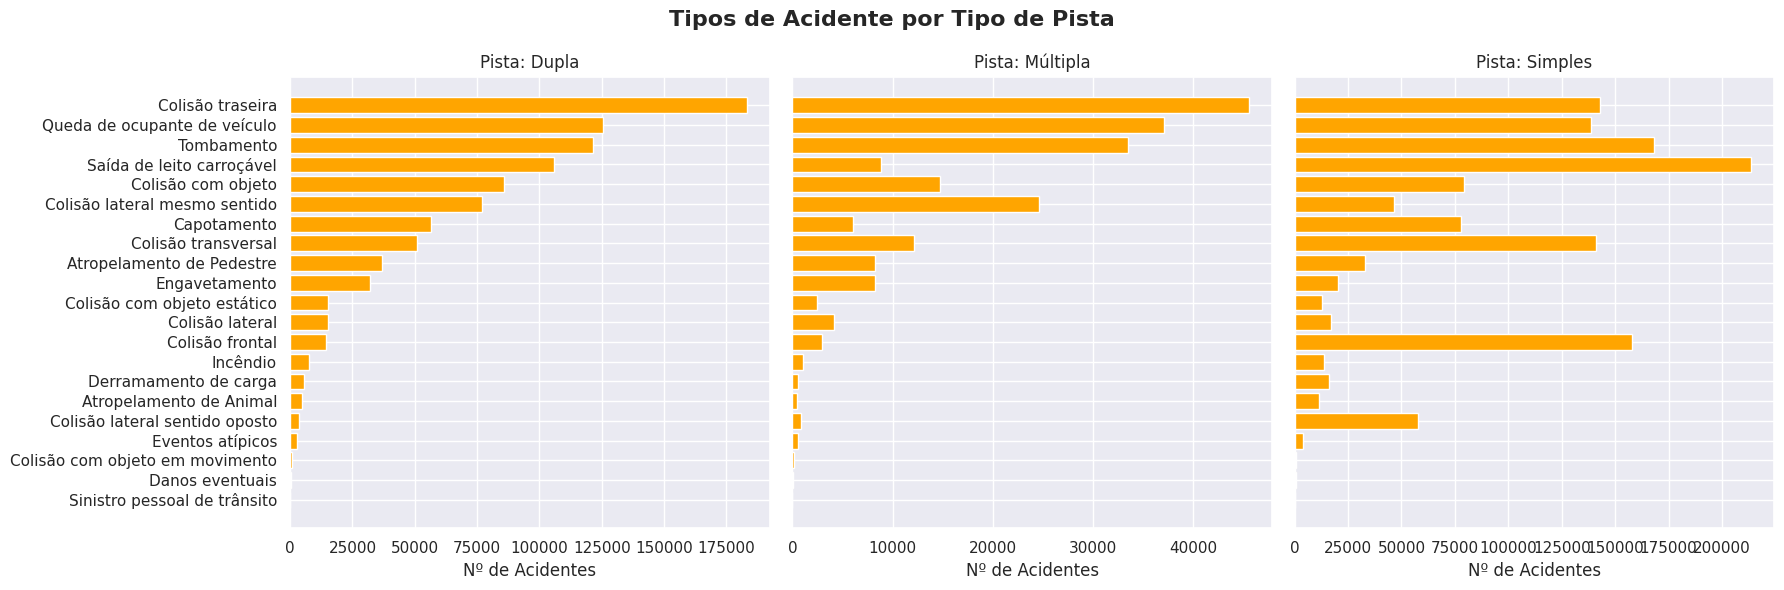

In [50]:
if 'tipo_pista' in df.columns and 'tipo_acidente' in df.columns:
    acidente_pista = df.groupby(['tipo_pista', 'tipo_acidente']).size().reset_index(name='acidentes')

    tipos_pista = acidente_pista['tipo_pista'].unique()
    fig, axes = plt.subplots(1, len(tipos_pista), figsize=(18,6), sharey=True)
    fig.suptitle("Tipos de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')

    for ax, pista in zip(axes, tipos_pista):
        subset = (
            acidente_pista[acidente_pista['tipo_pista'] == pista]
            .sort_values('acidentes', ascending=False)
        )
        ax.barh(subset['tipo_acidente'], subset['acidentes'], color='orange')
        ax.set_title(f"Pista: {pista}")
        ax.set_xlabel("Nº de Acidentes")
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


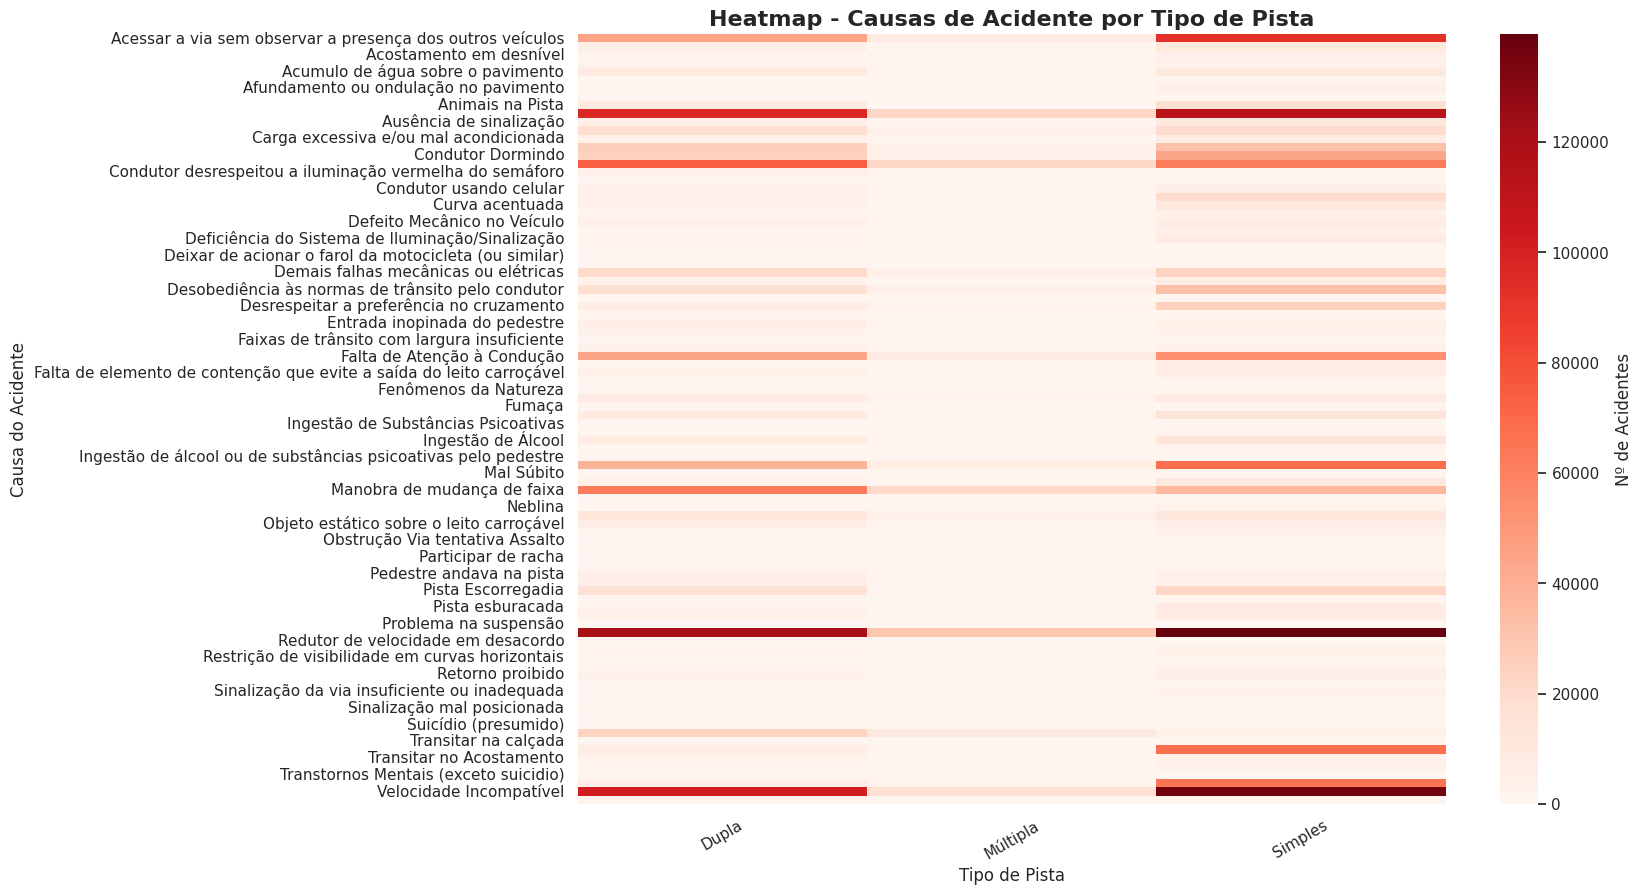

In [51]:
import seaborn as sns

if 'tipo_pista' in df.columns and 'causa_acidente' in df.columns:
    causa_pista = df.groupby(['tipo_pista', 'causa_acidente']).size().reset_index(name='acidentes')
    pivot = causa_pista.pivot(index='causa_acidente', columns='tipo_pista', values='acidentes').fillna(0)

    plt.figure(figsize=(14,10))
    sns.heatmap(pivot, annot=False, cmap="Reds", cbar_kws={'label': 'Nº de Acidentes'})
    plt.title("Heatmap - Causas de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')
    plt.xlabel("Tipo de Pista")
    plt.ylabel("Causa do Acidente")
    plt.xticks(rotation=30)
    plt.yticks(rotation=0)
    plt.show()


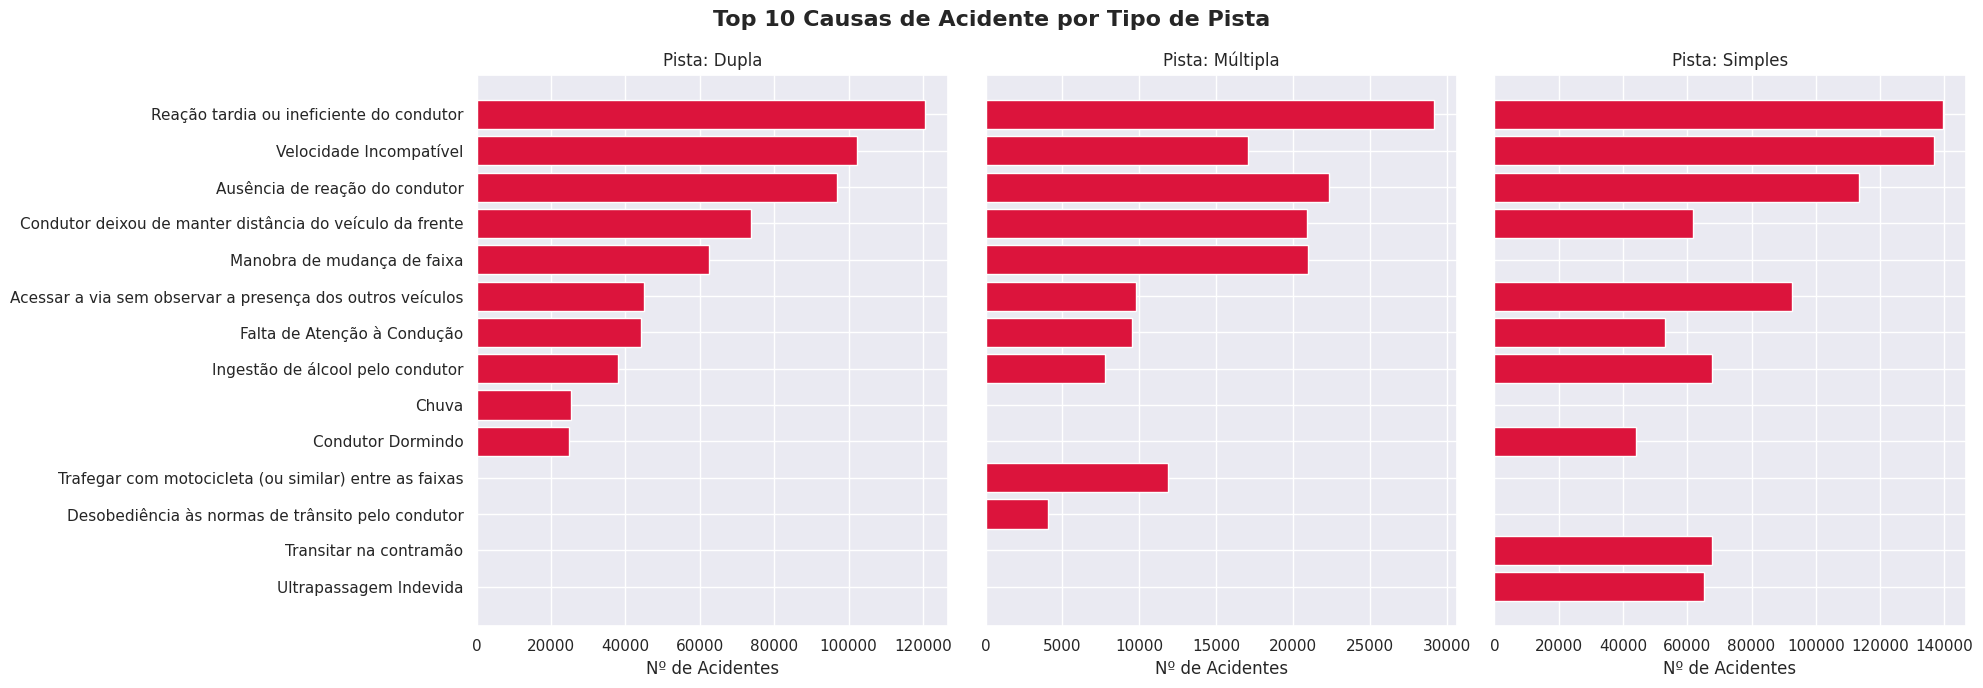

In [52]:
if 'tipo_pista' in df.columns and 'causa_acidente' in df.columns:
    causa_pista = df.groupby(['tipo_pista', 'causa_acidente']).size().reset_index(name='acidentes')

    fig, axes = plt.subplots(1, len(causa_pista['tipo_pista'].unique()), figsize=(20, 7), sharey=True)
    fig.suptitle("Top 10 Causas de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')

    for ax, pista in zip(axes, causa_pista['tipo_pista'].unique()):
        top = (
            causa_pista[causa_pista['tipo_pista'] == pista]
            .sort_values('acidentes', ascending=False)
            .head(10)
        )
        ax.barh(top['causa_acidente'], top['acidentes'], color='crimson')
        ax.set_title(f"Pista: {pista}")
        ax.set_xlabel("Nº de Acidentes")
        ax.invert_yaxis()

    plt.tight_layout()
    plt.show()


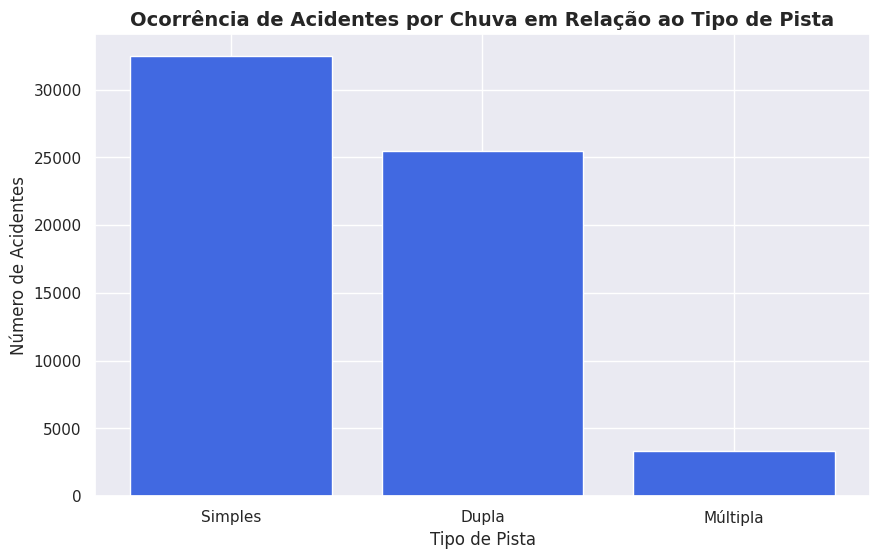

In [53]:
if 'tipo_pista' in df.columns and 'causa_acidente' in df.columns:
    # Filtrar apenas acidentes causados por "Chuava"
    chuva = df[df['causa_acidente'].str.contains("Chuva", case=False, na=False)]

    # Agrupar por tipo de pista e contar ocorrências
    chuva_pista = chuva.groupby('tipo_pista').size().reset_index(name='acidentes')

    # Ordenar para deixar o gráfico mais organizado
    chuva_pista = chuva_pista.sort_values('acidentes', ascending=False)

    # Criar gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(chuva_pista['tipo_pista'], chuva_pista['acidentes'], color='royalblue')
    plt.title("Ocorrência de Acidentes por Chuva em Relação ao Tipo de Pista", fontsize=14, fontweight="bold")
    plt.xlabel("Tipo de Pista")
    plt.ylabel("Número de Acidentes")
    plt.show()

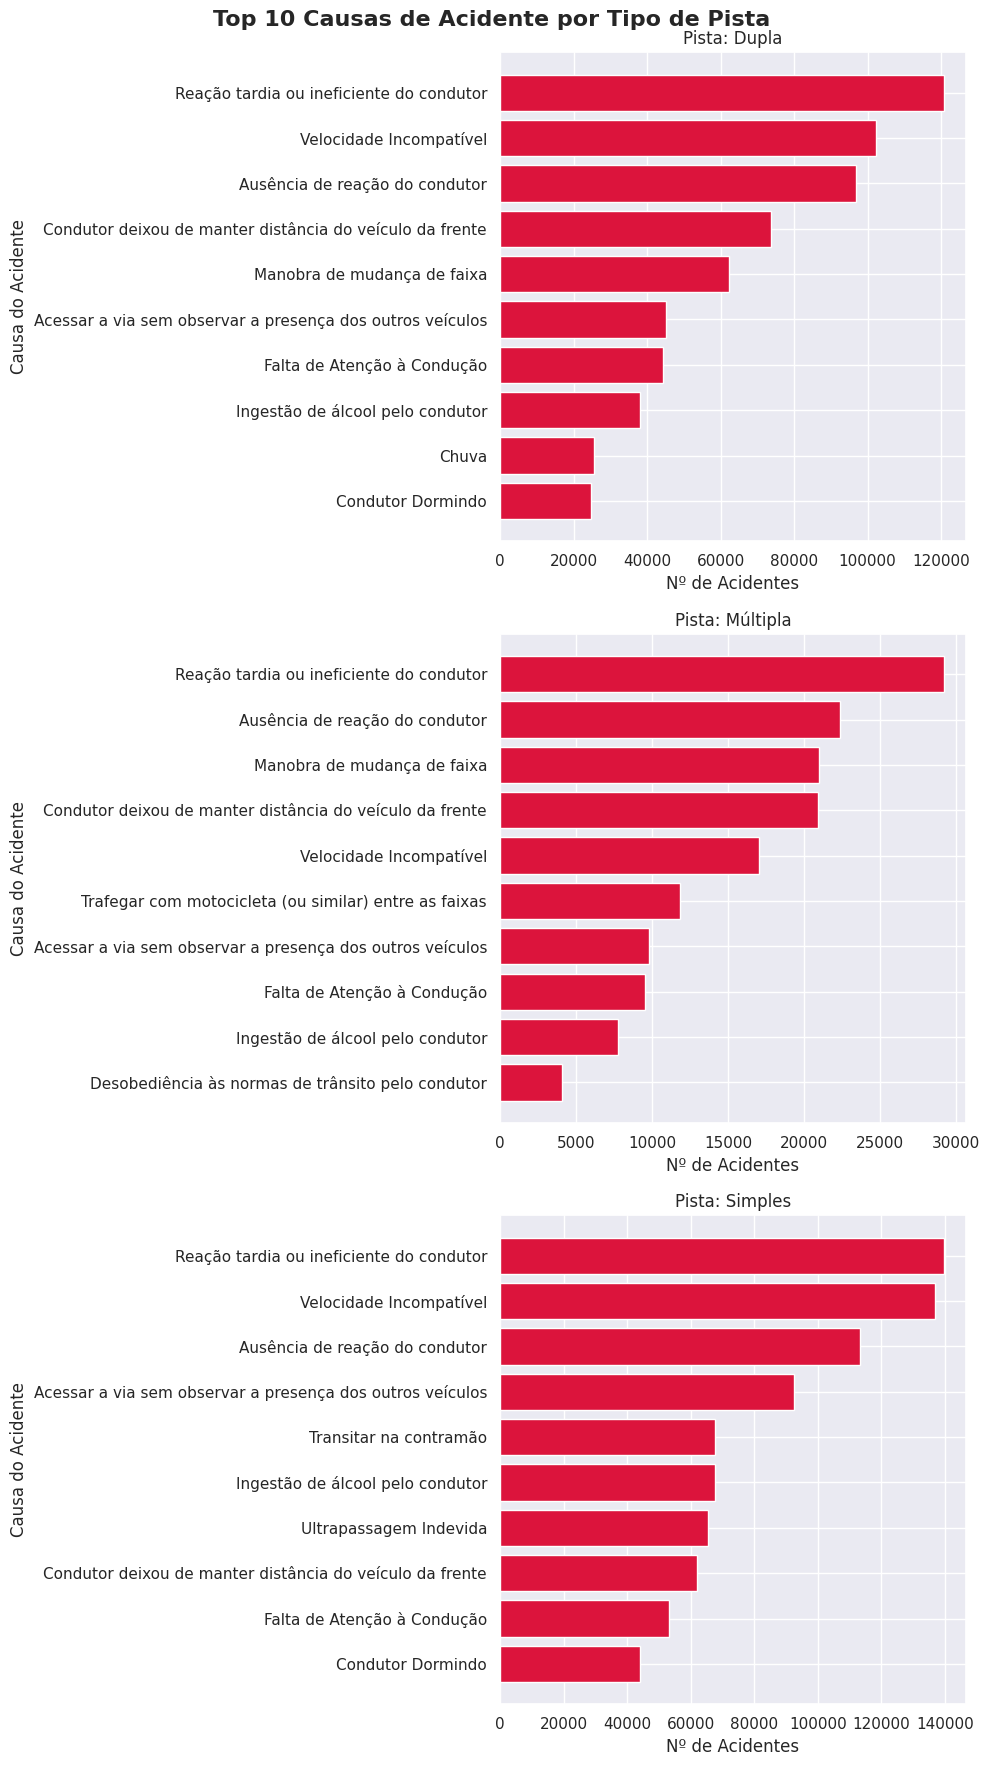

In [54]:
import matplotlib.pyplot as plt

if 'tipo_pista' in df.columns and 'causa_acidente' in df.columns:
    # Agrupar por tipo de pista e causa de acidente
    causa_pista = (
        df.groupby(['tipo_pista', 'causa_acidente'])
        .size()
        .reset_index(name='acidentes')
    )

    # Descobrir quantos tipos de pista existem
    tipos = causa_pista['tipo_pista'].unique()
    n_tipos = len(tipos)

    # Criar um subplot para cada tipo de pista
    fig, axes = plt.subplots(n_tipos, 1, figsize=(10, 6*n_tipos), sharex=False)
    fig.suptitle("Top 10 Causas de Acidente por Tipo de Pista", fontsize=16, fontweight='bold')

    # Caso só exista um tipo de pista, axes não é lista → forçar lista
    if n_tipos == 1:
        axes = [axes]

    # Iterar sobre os tipos de pista
    for ax, pista in zip(axes, tipos):
        top10 = (
            causa_pista[causa_pista['tipo_pista'] == pista]
            .sort_values('acidentes', ascending=False)
            .head(10)
        )

        ax.barh(top10['causa_acidente'], top10['acidentes'], color='crimson')
        ax.set_title(f"Pista: {pista}")
        ax.set_xlabel("Nº de Acidentes")
        ax.set_ylabel("Causa do Acidente")
        ax.invert_yaxis()  # deixa o maior no topo

    plt.tight_layout()
    plt.show()



# Veiculos x Acidentes

In [55]:
df_veiculos = df[(df['ano_fabricacao_veiculo'] >= 1990) & (df['ano_fabricacao_veiculo'] <= 2025)].copy()


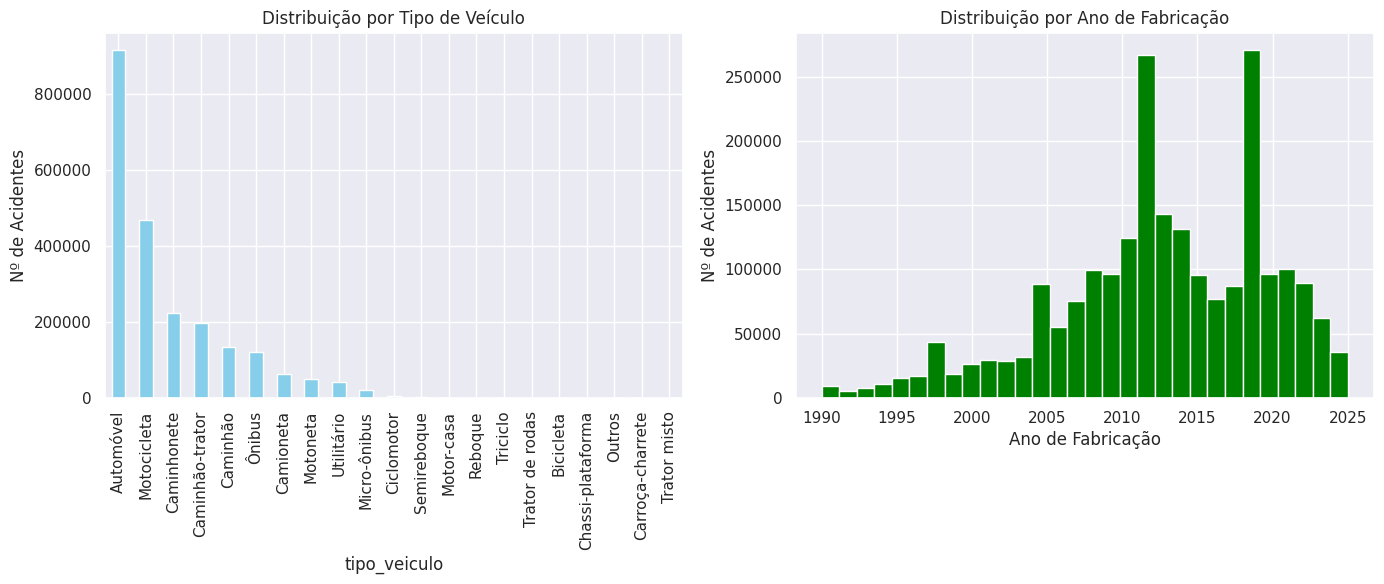

In [56]:

if {'tipo_veiculo', 'ano_fabricacao_veiculo'}.issubset(df_veiculos.columns):
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Distribuição por tipo de veículo
    df_veiculos['tipo_veiculo'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title("Distribuição por Tipo de Veículo")
    axes[0].set_ylabel("Nº de Acidentes")

    # Distribuição por ano de fabricação
    df_veiculos['ano_fabricacao_veiculo'].dropna().astype(int).hist(ax=axes[1], bins=30, color='green')
    axes[1].set_title("Distribuição por Ano de Fabricação")
    axes[1].set_xlabel("Ano de Fabricação")
    axes[1].set_ylabel("Nº de Acidentes")

    plt.tight_layout()
    plt.show()



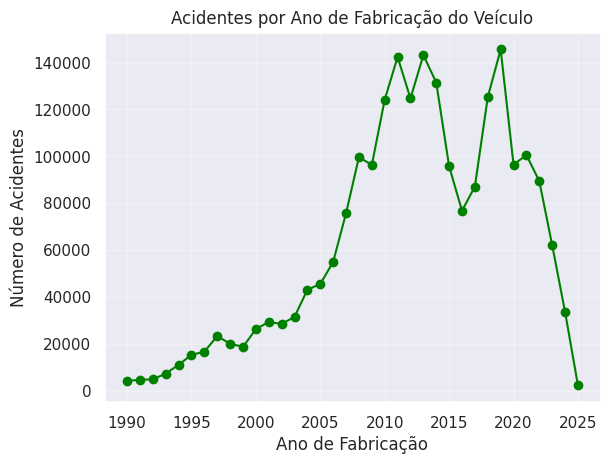

In [57]:
df_veiculos['ano_fabricacao_veiculo'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Acidentes por Ano de Fabricação do Veículo")
plt.xlabel("Ano de Fabricação")
plt.ylabel("Número de Acidentes")
plt.grid(True, alpha=0.3)
plt.show()


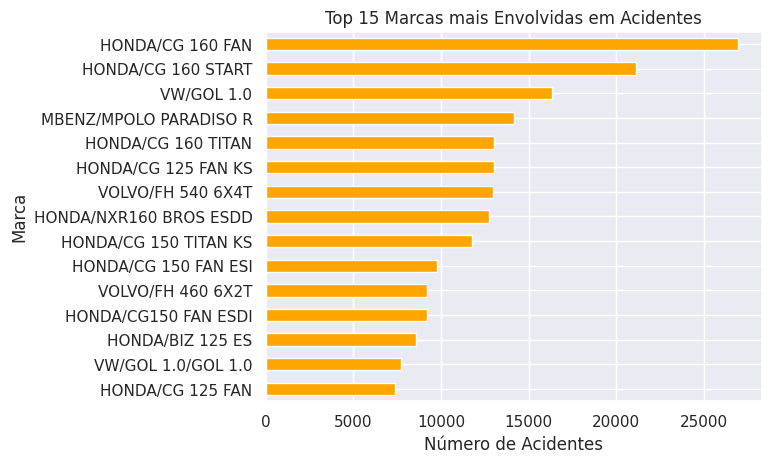

In [58]:
top_marcas = df_veiculos['marca'].value_counts().head(15)
top_marcas.plot(kind='barh', color='orange')
plt.title("Top 15 Marcas mais Envolvidas em Acidentes")
plt.xlabel("Número de Acidentes")
plt.ylabel("Marca")
plt.gca().invert_yaxis()
plt.show()


🚨 Top 10 marcas com mais acidentes:
marca
HONDA/CG 160 FAN          26945
HONDA/CG 160 START        21106
VW/GOL 1.0                16360
MBENZ/MPOLO PARADISO R    14189
HONDA/CG 160 TITAN        13050
HONDA/CG 125 FAN KS       13039
VOLVO/FH 540 6X4T         12987
HONDA/NXR160 BROS ESDD    12766
HONDA/CG 150 TITAN KS     11750
HONDA/CG 150 FAN ESI       9768
Name: count, dtype: int64


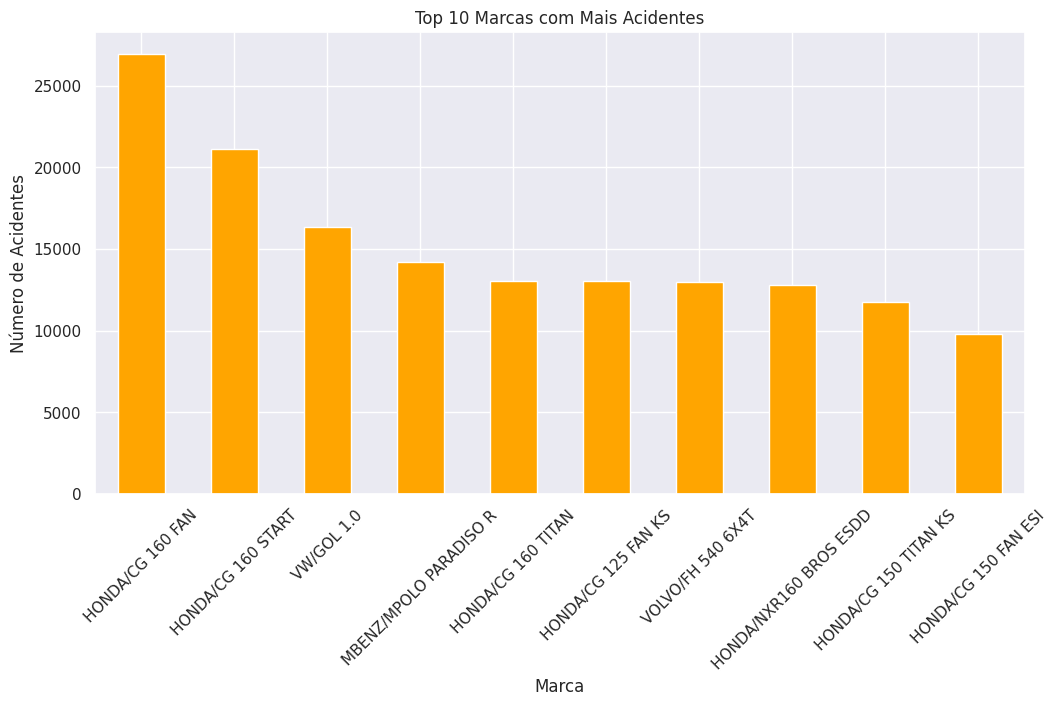

In [59]:
if 'marca' in df_veiculos.columns:
    # Contagem de acidentes por marca
    acidentes_por_marca = df_veiculos['marca'].value_counts()

    # Top 10 marcas com mais acidentes
    top_10_marcas = acidentes_por_marca.head(10)
    print("🚨 Top 10 marcas com mais acidentes:")
    print(top_10_marcas)

    # Visualização
    plt.figure(figsize=(12,6))
    top_10_marcas.plot(kind='bar', color='orange')
    plt.title("Top 10 Marcas com Mais Acidentes")
    plt.xlabel("Marca")
    plt.ylabel("Número de Acidentes")
    plt.xticks(rotation=45)
    plt.show()


In [60]:
# Verifica se a coluna 'marca' existe no DataFrame
if 'marca' in df_veiculos.columns:
    # Conta o número de marcas únicas na coluna
    numero_de_marcas = df_veiculos['marca'].nunique()

    # Exibe o resultado
    print(f"📄 Existem {numero_de_marcas} marcas diferentes na planilha.")
else:
    print("A coluna 'marca' não foi encontrada no DataFrame.")

📄 Existem 14435 marcas diferentes na planilha.


# Etapa 2.0

In [61]:
anos_por_marca = (
    df.groupby('marca')['ano_fabricacao_veiculo']
    .nunique()  # conta os anos únicos
    .reset_index(name='qtd_anos')
)

# Filtrar apenas as marcas com mais de 1 ano de fabricação
marcas_varios_anos = anos_por_marca[anos_por_marca['qtd_anos'] == 1]

print(marcas_varios_anos)

                                                   marca  qtd_anos
0      ""FORD/ESCORT L """"SE""""""/ESCORT L """"SE""...         1
1                                              A1/TRILHA         1
2                                                  ADAX/         1
4                                               AGRALE//         1
11                              AGRALE/140006X2/140006X2         1
...                                                  ...       ...
15440                            YAMAHA/YBR125 FACTOR LE         1
15441           YAMAHA/YBR125 FACTOR LE/YBR125 FACTOR LE         1
15452                             YAMAHA/YS150 FAZER PRO         1
15453             YAMAHA/YS150 FAZER PRO/YS150 FAZER PRO         1
15462                             YAMAHA/YZF R3 WGP 60TH         1

[5718 rows x 2 columns]


In [62]:
import pandas as pd

# 1️⃣ Contar os acidentes por causa
top_causas = (
    df.groupby('causa_acidente')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(10)  # Top 10 causas
)

print("Top 10 causas de acidente:")
print(top_causas)

# 2️⃣ Para cada causa, listar os modelos que mais aparecem
for causa in top_causas['causa_acidente']:
    top_modelos = (
        df[df['causa_acidente'] == causa]
        .groupby('marca')['ano_fabricacao_veiculo']
        .count()  # ou size()
        .reset_index(name='qtd_veiculos')
        .sort_values('qtd_veiculos', ascending=False)
        .head(5)  # Top 5 modelos por causa
    )
    print(f"\nCausa: {causa}")
    print(top_modelos)


Top 10 causas de acidente:
                                       causa_acidente  qtd_acidentes
71           Reação tardia ou ineficiente do condutor         289419
90                            Velocidade Incompatível         255983
9                      Ausência de reação do condutor         232566
15  Condutor deixou de manter distância do veículo...         156529
0   Acessar a via sem observar a presença dos outr...         147284
54                        Manobra de mudança de faixa         119964
51                   Ingestão de álcool pelo condutor         113340
38                        Falta de Atenção à Condução         106958
85                             Transitar na contramão          77290
89                             Ultrapassagem Indevida          74326

Causa: Reação tardia ou ineficiente do condutor
                                          marca  qtd_veiculos
6101                Não Informado/Não Informado         10095
2330                           HONDA/CG 1

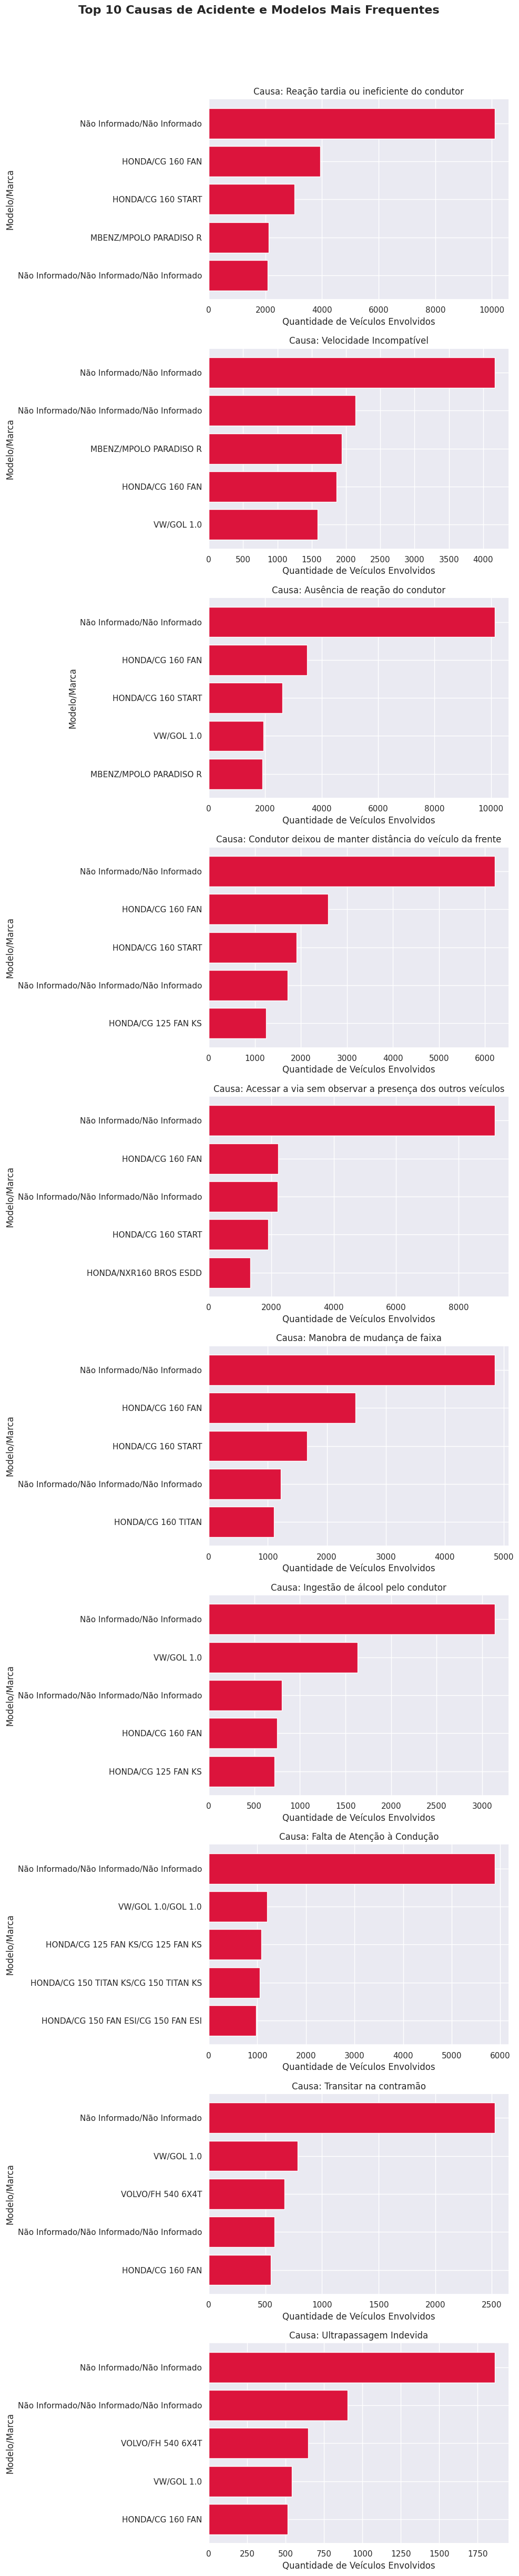

In [63]:
import matplotlib.pyplot as plt

# Top 10 causas de acidente
top_causas = (
    df.groupby('causa_acidente')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(10)
)

n_causas = len(top_causas)

fig, axes = plt.subplots(n_causas, 1, figsize=(10, 5*n_causas), sharex=False)
fig.suptitle("Top 10 Causas de Acidente e Modelos Mais Frequentes", fontsize=16, fontweight='bold')

# Garantir que axes seja lista mesmo com 1 subplot
if n_causas == 1:
    axes = [axes]

for ax, causa in zip(axes, top_causas['causa_acidente']):
    # Top modelos/marcas para a causa atual
    top_modelos = (
        df[df['causa_acidente'] == causa]
        .groupby('marca')['ano_fabricacao_veiculo']
        .count()
        .reset_index(name='qtd_veiculos')
        .sort_values('qtd_veiculos', ascending=False)
        .head(5)  # Top 5 modelos/marcas por causa
    )
    
    ax.barh(top_modelos['marca'], top_modelos['qtd_veiculos'], color='crimson')
    ax.set_title(f"Causa: {causa}")
    ax.set_xlabel("Quantidade de Veículos Envolvidos")
    ax.set_ylabel("Modelo/Marca")
    ax.invert_yaxis()  # maior no topo

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


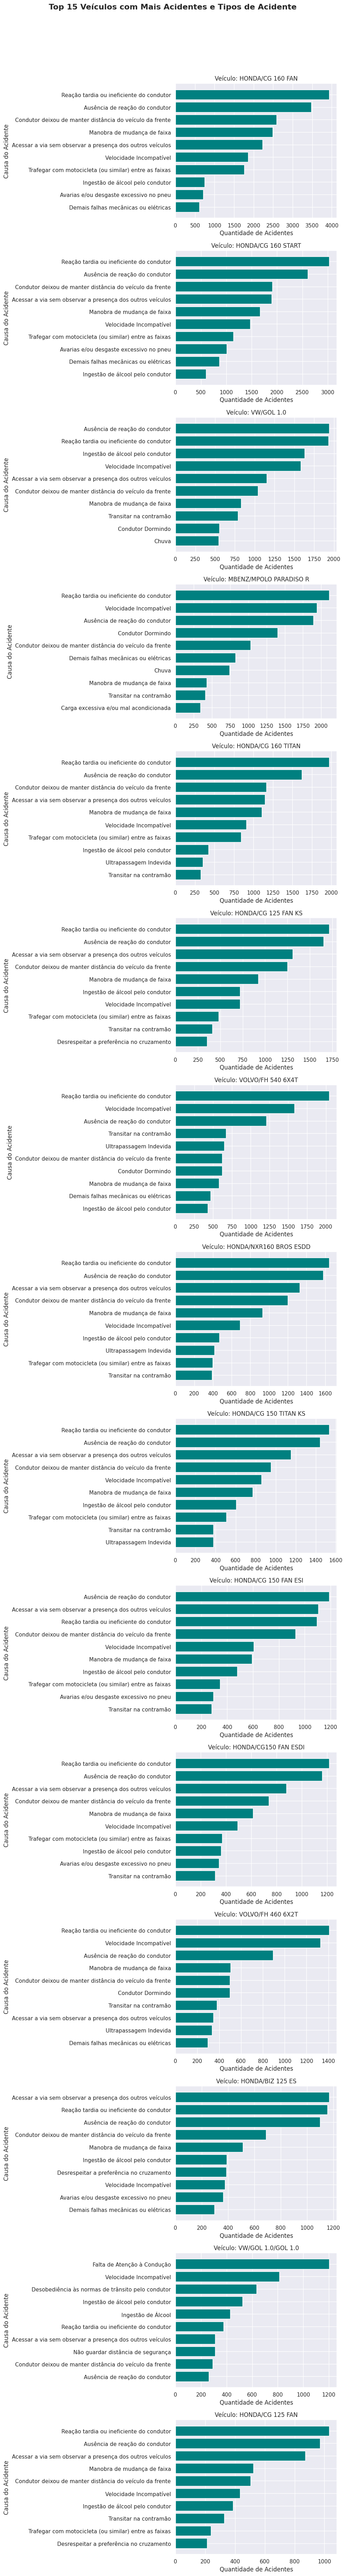

In [64]:

# Definir os valores que consideramos inválidos
valores_invalidos = ['N']

# Filtrar o DataFrame
df_limpo = df[~df['marca'].isin(valores_invalidos)]

# Agora refazer o Top 10 veículos com mais acidentes
top_veiculos = (
    df_limpo.groupby('marca')['causa_acidente']
    .count()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(20)
)

top_veiculos = top_veiculos.iloc[4:19]  # 4º até 13º = 10 veículos


n_veiculos = len(top_veiculos)

fig, axes = plt.subplots(n_veiculos, 1, figsize=(10, 5*n_veiculos), sharex=False)
fig.suptitle("Top 15 Veículos com Mais Acidentes e Tipos de Acidente", fontsize=16, fontweight='bold')

# Garantir que axes seja lista mesmo com 1 subplot
if n_veiculos == 1:
    axes = [axes]

for ax, veiculo in zip(axes, top_veiculos['marca']):
    # Tipos de acidentes para o veículo atual
    top_causas = (
        df[df['marca'] == veiculo]
        .groupby('causa_acidente')
        .size()
        .reset_index(name='qtd_acidentes')
        .sort_values('qtd_acidentes', ascending=False)
        .head(10)  # Top 10 causas por veículo
    )
    
    ax.barh(top_causas['causa_acidente'], top_causas['qtd_acidentes'], color='teal')
    ax.set_title(f"Veículo: {veiculo}")
    ax.set_xlabel("Quantidade de Acidentes")
    ax.set_ylabel("Causa do Acidente")
    ax.invert_yaxis()  # maior no topo

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


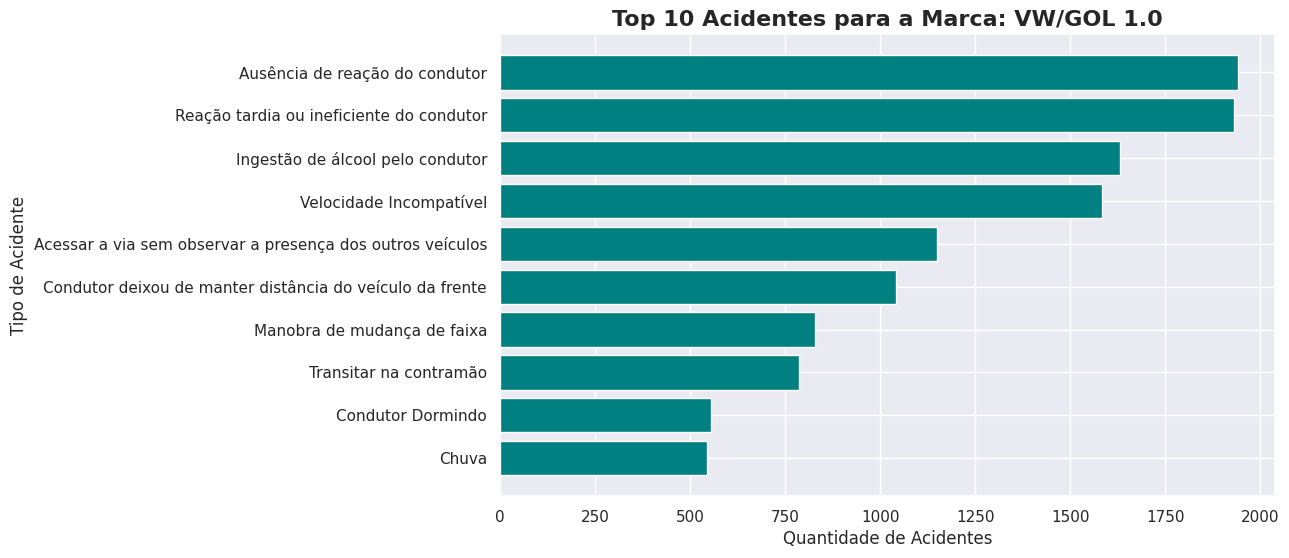

In [65]:
import matplotlib.pyplot as plt

# Definir os valores inválidos
valores_invalidos = ['N']

# Filtrar o DataFrame
df_limpo = df[~df['marca'].isin(valores_invalidos)]

# Marca específica que queremos analisar
marca_especifica = "VW/GOL 1.0"

# Filtrar apenas os acidentes dessa marca
df_marca = df_limpo[df_limpo['marca'] == marca_especifica]

# Contar os Top 10 tipos de acidentes dessa marca
top_causas = (
    df_marca.groupby('causa_acidente')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_causas['causa_acidente'], top_causas['qtd_acidentes'], color='teal')
plt.title(f"Top 10 Acidentes para a Marca: {marca_especifica}", fontsize=16, fontweight='bold')
plt.xlabel("Quantidade de Acidentes")
plt.ylabel("Tipo de Acidente")
plt.gca().invert_yaxis()  # maior no topo
plt.show()


/tmp/ipykernel_41475/3014131604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['tipo_pista'] = df_limpo['tipo_pista'].str.strip().str.lower()


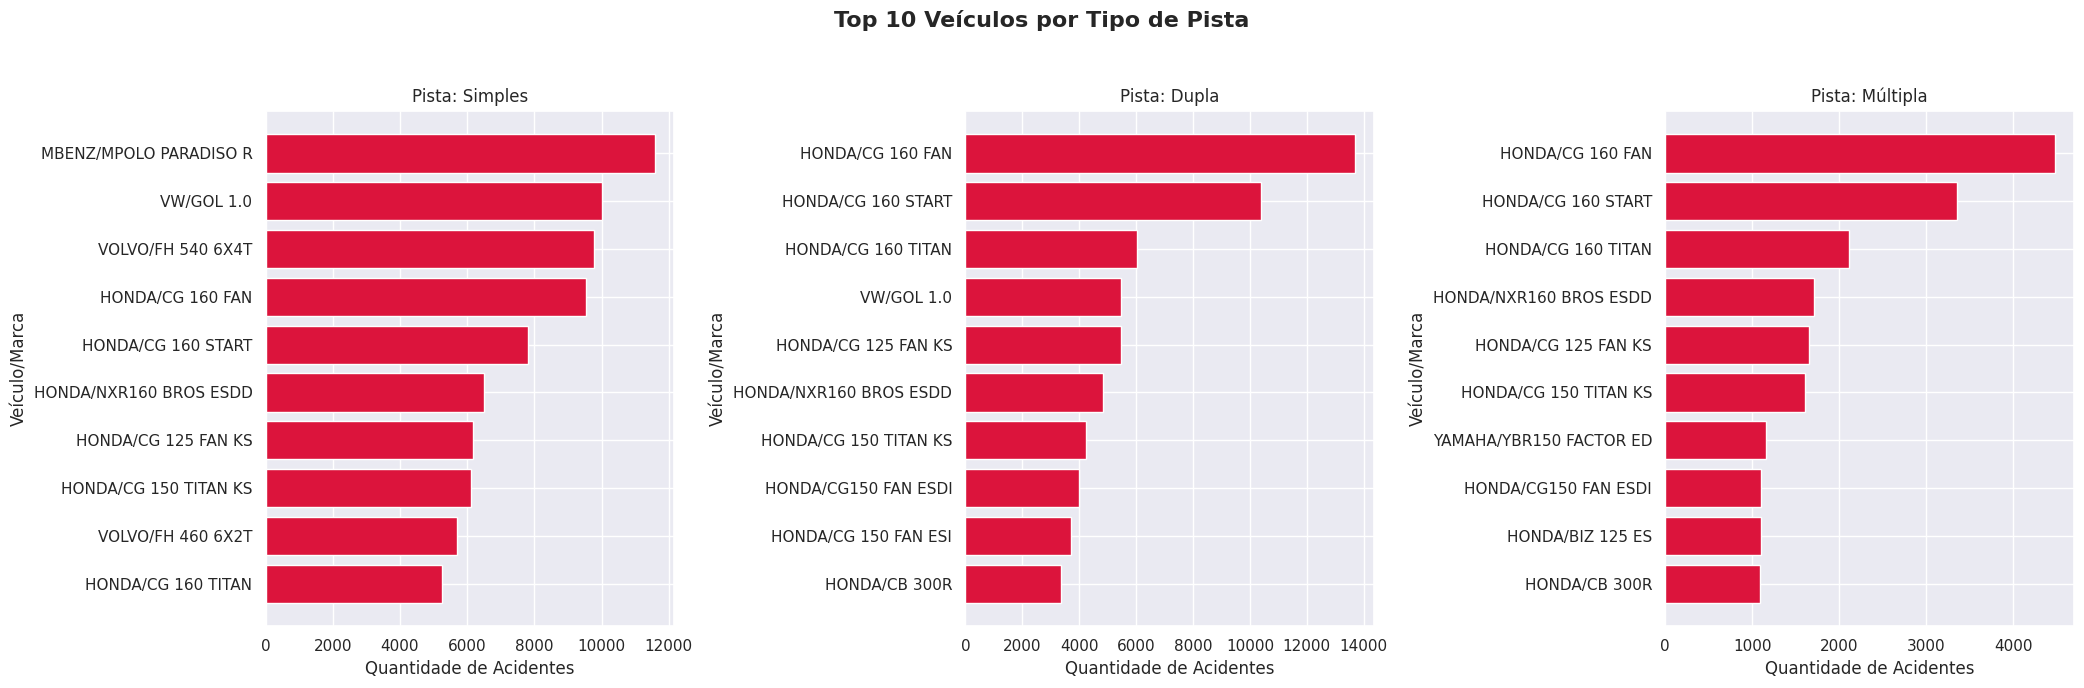

In [66]:

# Limpar marcas inválidas
valores_invalidos = ['Não Informado/Não Informado', 'Não Informado/Não Informado/Não Informado', 'NA/NA/NA', 'NA/NA']
df_limpo = df[~df['marca'].isin(valores_invalidos)]

# Padronizar tipo_pista (opcional, se houver inconsistências)
df_limpo['tipo_pista'] = df_limpo['tipo_pista'].str.strip().str.lower()

# Identificar todos os tipos de pista presentes no dataset
tipos_pista = df_limpo['tipo_pista'].unique()

# Criar subplots
fig, axes = plt.subplots(1, len(tipos_pista), figsize=(7*len(tipos_pista), 7), sharey=False)
fig.suptitle("Top 10 Veículos por Tipo de Pista", fontsize=16, fontweight='bold')

# Garantir que axes seja lista
if len(tipos_pista) == 1:
    axes = [axes]

for ax, pista in zip(axes, tipos_pista):
    # Filtrar acidentes dessa pista
    df_pista = df_limpo[df_limpo['tipo_pista'] == pista]
    
    # Top 10 veículos/marcas nessa pista
    top_veiculos = (
        df_pista.groupby('marca')
        .size()
        .reset_index(name='qtd_acidentes')
        .sort_values('qtd_acidentes', ascending=False)
        .head(10)
    )
    
    ax.barh(top_veiculos['marca'], top_veiculos['qtd_acidentes'], color='crimson')
    ax.set_title(f"Pista: {pista.capitalize()}")
    ax.set_xlabel("Quantidade de Acidentes")
    ax.set_ylabel("Veículo/Marca")
    ax.invert_yaxis()  # maior no topo

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [67]:
# Limpar marcas inválidas
valores_invalidos = ['N']
df_limpo = df[~df['marca'].isin(valores_invalidos)]

# Contar acidentes por veículo
top_veiculos = (
    df_limpo.groupby('marca')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(4)  # Top 4
)

# Exibir
print("Top 4 Veículos com Mais Acidentes:")
print(top_veiculos)


Top 4 Veículos com Mais Acidentes:
                                           marca  qtd_acidentes
11125                Não Informado/Não Informado          75377
10958                                      NA/NA          68518
11126  Não Informado/Não Informado/Não Informado          33694
10959                                   NA/NA/NA          30994
